In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/startup_funding.csv


In [14]:
import numpy as np
import pandas as pd

df = pd.read_csv('/kaggle/input/startup_funding.csv', encoding='utf8')
df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [15]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


In [16]:
df['Remarks'].unique()
#dropping remarks column as 90% of the data is missing
df.drop(columns=['Remarks'],inplace=True)

In [17]:
#making Sr No as the index.

df.set_index(['Sr No'],inplace=True)

In [18]:
# Renaming cols
df.rename(columns={
    'Date dd/mm/yyyy' : 'Date',
    'Startup Name' : 'Startup',
    'Industry Vertical' : 'Vertical',
    'City  Location' : 'City',
    'InvestmentnType' : 'Investment Type'
}, inplace=True)

# Date

In [19]:
# changing Date dd/mm/yyyy to datatime datatype. 

# step 1 : checking if all the values in Date col follow the format - dd/mm/yyyy
df[~df['Date'].str.contains('../../....', regex=True)]

,Date,Startup,Vertical,SubVertical,City,Investors Name,Investment Type,Amount in USD
Sr No,,,,,,,,
193,05/072018,Loan Tap,Consumer Internet,Online Lending Platform For Salaried Professio...,Mumbai,"Shunwei Capital, Tuscan Ventures, Ashish Goenk...",Private Equity,"62,50,000"
2572,01/07/015,HandyHome,Hyperlocal Electronics repair Service,NaN,Mumbai,"Bessemer Ventures, Kae Capital",Seed Funding,"6,30,000"
2607,\\xc2\\xa010/7/2015,\\xc2\\xa0Infinity Assurance,\\xc2\\xa0Warranty Programs Service Administra...,NaN,\\xc2\\xa0New Delhi,\\xc2\\xa0Indian Angel Network,Seed Funding,"\\xc2\\xa0600,000"
2776,12/05.2015,Mobiefit,Mobile Fitness App,NaN,Goa,Prototyze,Seed Funding,NaN
2777,12/05.2015,Plancess,Online Education Platform,NaN,Mumbai,"Rajendra Gogri,\\xc2\\xa0 Chandrakant Gogri",Seed Funding,"20,00,000"
2832,13/04.2015,The Porter,Logistics Tech,NaN,Mumbai,Kae Capital,Seed Funding,"5,00,000"
3012,15/01.2015,Wishberry,NaN,NaN,NaN,"Rajan Anandan, Shankar Mahadevan, Deep Kalra &...",Seed Funding,"6,50,000"


In [20]:
df[df['Date'].str.contains('../..//...')]

,Date,Startup,Vertical,SubVertical,City,Investors Name,Investment Type,Amount in USD
Sr No,,,,,,,,
3030,22/01//2015,Corporate360,NaN,NaN,NaN,Group of Angel Investors,Seed Funding,"2,00,000"


In [21]:
#step 2 : correcting the entries with wrong formats. Total there were 7 mismatch
df['Date'].replace({
    '05/072018' : '05/07/2018',
    '01/07/015' : '01/07/2015',
    '12/05.2015' : '12/05/2015',
    '13/04.2015' : '13/04/2015',
    '15/01.2015' : '15/01/2015',
    '\\\\xc2\\\\xa010/7/2015' : '10/07/2015',
    '22/01//2015' : '22/01/2015'
},inplace=True)

In [22]:
# step 3 : converting the date col to type datetime
df['Date'] = pd.to_datetime(df['Date'], format="%d/%m/%Y")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3044 entries, 1 to 3044
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             3044 non-null   datetime64[ns]
 1   Startup          3044 non-null   object        
 2   Vertical         2873 non-null   object        
 3   SubVertical      2108 non-null   object        
 4   City             2864 non-null   object        
 5   Investors Name   3020 non-null   object        
 6   Investment Type  3040 non-null   object        
 7   Amount in USD    2084 non-null   object        
dtypes: datetime64[ns](1), object(7)
memory usage: 214.0+ KB


In [13]:
print('\\\\xc2\\\\xa0')
# \xc2\xa0 means 0xC2 0xA0 is so-called. Non-breaking space. It is a kind of invisible control character in UTF-8 encodings.

\\xc2\\xa0


# Startup

In [23]:
df[df['Startup'].str.contains('\\\\xc2', na=False)]

,Date,Startup,Vertical,SubVertical,City,Investors Name,Investment Type,Amount in USD
Sr No,,,,,,,,
1395,2016-09-23,\\xc2\\xa0CloudCherry,Technology,CRM SAAS Platform,Chennai,"Vertex Ventures, Cisco Ventures, IDG Ventures",Private Equity,"60,00,000"
2505,2015-08-10,NearBuy (previously\\xc2\\xa0 groupon India),Hyper-Local Ecommerce,NaN,New Delhi,Sequoia Capital,Private Equity,"1,60,00,000"
2603,2015-07-09,\\xc2\\xa0News in shorts,\\xc2\\xa0News Aggregator mobile app,NaN,\\xc2\\xa0Noida,\\xc2\\xa0Tiger Global,Private Equity,"\\xc2\\xa020,000,000"
2604,2015-07-09,\\xc2\\xa0Bluestone,\\xc2\\xa0Online Jewellery Store,NaN,\\xc2\\xa0Bangalore,"\\xc2\\xa0IvyCap Ventures, Accel Partners, Dra...",Private Equity,"\\xc2\\xa016,200,000"
2605,2015-07-09,\\xc2\\xa0Shopsity,\\xc2\\xa0Fashion Info Aggregator App,NaN,\\xc2\\xa0Gurgaon,"\\xc2\\xa0 Sandeep Aggarwal, Teruhide Sato",Seed Funding,\\xc2\\xa0N/A
2606,2015-07-09,\\xc2\\xa0Notesgen,\\xc2\\xa0Online Study Notes Marketplace,NaN,\\xc2\\xa0New Delhi,"\\xc2\\xa0Rajeev Saraf, Arvind Jha, R. Satya N...",Seed Funding,\\xc2\\xa0N/A
2607,2015-07-10,\\xc2\\xa0Infinity Assurance,\\xc2\\xa0Warranty Programs Service Administra...,NaN,\\xc2\\xa0New Delhi,\\xc2\\xa0Indian Angel Network,Seed Funding,"\\xc2\\xa0600,000"
2608,2015-07-10,\\xc2\\xa0Footprints Education,\\xc2\\xa0Pre-School Chain,NaN,\\xc2\\xa0Gurgaon,"\\xc2\\xa0LetsVenture, Kumar Bansal, Kshitij Jain",Seed Funding,"\\xc2\\xa0685,000"
2609,2015-07-10,\\xc2\\xa0Loylty Rewards,\\xc2\\xa0Premium Loyalty Rewards Point Manage...,NaN,\\xc2\\xa0Mumbai,\\xc2\\xa0IndianIdeas.com,Private Equity,"\\xc2\\xa019,350,000"


In [32]:
df['Startup'] = df['Startup'].str.replace(u'\\\\xc2\\\\xa0','')
df['Startup'] = df['Startup'].str.replace(u'\\\\xe2\\\\x80\\\\x99','')
df['Startup'] = df['Startup'].str.replace(u'\\\\n','')
# following are single cases 
df['Startup'] = df['Startup'].str.replace(u'\\xe2\\x80\\x99','')
df['Startup'] = df['Startup'].str.strip('"')
df['Startup'] = df['Startup'].str.replace(u'\\\\','')

In [33]:
df[df['Startup'].str.contains('\\\\', na=False)]

,Date,Startup,Vertical,SubVertical,City,Investors Name,Investment Type,Amount in USD
Sr No,,,,,,,,


The hardcoded way for replacing control characters in Startup col
df['Startup'].replace({
        '\\\\xc2\\\\xa0Infinity Assurance': 'Infinity Assurance',
        '\\\\xc2\\\\xa0CloudCherry' : 'CloudCherry',
        'NearBuy (previously\\\\xc2\\\\xa0 groupon India)' : 'NearBuy (previously groupon India)',
        '\\\\xc2\\\\xa0News in shorts' : 'News in shorts',
        '\\\\xc2\\\\xa0Bluestone' : 'Bluestone',
        '\\\\xc2\\\\xa0Shopsity' : 'Shopsity',
        '\\\\xc2\\\\xa0Notesgen' : 'Notesgen',
        '\\\\xc2\\\\xa0Infinity Assurance' : 'Infinity Assurance',
        '\\\\xc2\\\\xa0Footprints Education' : 'Footprints Education',
        '\\\\xc2\\\\xa0Loylty Rewards' : 'Loylty Rewards',
        '\\\\xc2\\\\xa0Ameyo' : 'Ameyo',
        '\\\\xc2\\\\xa0Mamagoto' : 'Mamagoto',
        '\\\\xc2\\\\xa0Satvacart' : 'Satvacart',
        '\\\\xc2\\\\xa0Nudgespot' : 'Nudgespot',
            },inplace=True)

In [15]:
df.tail(10)

,Date,Startup,Vertical,SubVertical,City,Investors Name,Investment Type,Amount in USD
Sr No,,,,,,,,
3035,2015-01-24,Aasaanjobs,NaN,NaN,NaN,"Inventus Capital Partners, IDG Ventures",Seed Funding,"15,00,000"
3036,2015-01-24,Impartus,NaN,NaN,NaN,Kaizen Private Equity,Private Equity,NaN
3037,2015-01-25,Thrill App,NaN,NaN,NaN,People Group (Shaadi.com),Private Equity,"10,00,000"
3038,2015-01-27,CarDekho.com,NaN,NaN,NaN,"Hillhouse Capital, Tybourne Capital",Private Equity,"5,00,00,000"
3039,2015-01-28,Grabhouse.com,NaN,NaN,NaN,"Kalaari Capital, Sequoia Capital",Private Equity,"25,00,000"
3040,2015-01-29,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"45,00,000"
3041,2015-01-29,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"8,25,000"
3042,2015-01-30,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"15,00,000"
3043,2015-01-30,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN


# Vertical

In [34]:
df[df['Vertical'].str.contains('\\\\xc2', na=False)]

,Date,Startup,Vertical,SubVertical,City,Investors Name,Investment Type,Amount in USD
Sr No,,,,,,,,
2176,2015-12-21,Peppertap,Hyperlocal\\xc2\\xa0 Grocery Delivery Service,NaN,Gurgaon,Innoven Capital,Private Equity,"40,00,000"
2239,2015-11-17,CraftsVilla,Women Ethnic Wear\\xc2\\xa0 Online Marketplace,NaN,Mumbai,"Sequoia India, Lightspeed Venture Partners, Ne...",Private Equity,"3,40,00,000"
2365,2015-10-27,Happitoo,Location based Nightlife recommendation\\xc2\\...,NaN,Mumbai,Unnamed investor,Seed Funding,"77,000"
2386,2015-09-01,Luxuryhues,Luxury goods\\xc2\\xa0 Shopping Platform,NaN,Gurgaon,Reliance Capital,Private Equity,"9,00,000"
2489,2015-08-06,Appvigil,App security\\xc2\\xa0 testing platform,NaN,Mumbai,"Ravi Gururaj, Gaurav Sharma, Viswanath Ramacha...",Seed Funding,"5,00,000"
2603,2015-07-09,News in shorts,\\xc2\\xa0News Aggregator mobile app,NaN,\\xc2\\xa0Noida,\\xc2\\xa0Tiger Global,Private Equity,"\\xc2\\xa020,000,000"
2604,2015-07-09,Bluestone,\\xc2\\xa0Online Jewellery Store,NaN,\\xc2\\xa0Bangalore,"\\xc2\\xa0IvyCap Ventures, Accel Partners, Dra...",Private Equity,"\\xc2\\xa016,200,000"
2605,2015-07-09,Shopsity,\\xc2\\xa0Fashion Info Aggregator App,NaN,\\xc2\\xa0Gurgaon,"\\xc2\\xa0 Sandeep Aggarwal, Teruhide Sato",Seed Funding,\\xc2\\xa0N/A
2606,2015-07-09,Notesgen,\\xc2\\xa0Online Study Notes Marketplace,NaN,\\xc2\\xa0New Delhi,"\\xc2\\xa0Rajeev Saraf, Arvind Jha, R. Satya N...",Seed Funding,\\xc2\\xa0N/A


In [35]:
df['Vertical'] = df['Vertical'].str.replace(u'\\\\xc2\\\\xa0','')
df['Vertical'] = df['Vertical'].str.replace(u'\\\\xe2\\\\x80\\\\x99','')
df['Vertical'] = df['Vertical'].str.replace(u'\\xe2\\x80\\x93','')
df['Vertical'] = df['Vertical'].str.replace(u'\\\\xc3\\\\xa9','')
df['Vertical'] = df['Vertical'].str.replace(u'\\\\n','')

In [79]:
# replace multiple strings using replace()
# wont work for unicode though

import pandas as pd

df = pd.DataFrame({'A': ['LOCAL TEST', 'TEST FOREIGN', 'ANOTHER HELLO', 'NOTHING']})

pattern = '|'.join(['LOCAL', 'FOREIGN', 'HELLO'])

df['A'] = df['A'].str.replace(pattern, 'CORP')

'\\\\xc2\\\\xa0|\\\\xe2\\\\x80\\\\x99|\\xe2\\x80\\x93'

In [36]:
df.loc[df['Vertical'].str.contains('\\\\', na=False)]

,Date,Startup,Vertical,SubVertical,City,Investors Name,Investment Type,Amount in USD
Sr No,,,,,,,,


df['Vertical'].replace(
        {
            'Hyperlocal\\\\xc2\\\\xa0 Grocery Delivery Service' : 'Hyperlocal Grocery Delivery Service',
            'Women Ethnic Wear\\\\xc2\\\\xa0 Online Marketplace' : 'Women Ethnic Wear Online Marketplace',
            'Location based Nightlife recommendation\\\\xc2\\\\xa0 Platform' : 'Location based Nightlife recommendation Platform',
            'Luxury goods\\\\xc2\\\\xa0 Shopping Platform' : 'Luxury goods Shopping Platform',
            'App security\\\\xc2\\\\xa0 testing platform' : 'App security testing platform',
            '\\\\xc2\\\\xa0News Aggregator mobile app' : 'News Aggregator mobile app',
            '\\\\xc2\\\\xa0Online Jewellery Store' : 'Online Jewellery Store',
            '\\\\xc2\\\\xa0Fashion Info Aggregator App' : 'Fashion Info Aggregator App',
            '\\\\xc2\\\\xa0Online Study Notes Marketplace' : 'Online Study Notes Marketplace',
            '\\\\xc2\\\\xa0Warranty Programs Service Administration' : 'Warranty Programs Service Administration',
            '\\\\xc2\\\\xa0Pre-School Chain' : 'Pre-School Chain',
            '\\\\xc2\\\\xa0Premium Loyalty Rewards Point Management' : 'Premium Loyalty Rewards Point Management',
            '\\\\xc2\\\\xa0Contact Center Software Platform' : 'Contact Center Software Platform',
            '\\\\xc2\\\\xa0Casual Dining restaurant Chain' : 'Casual Dining restaurant Chain',
            '\\\\xc2\\\\xa0Online Grocery Delivery' : 'Online Grocery Delivery',
            'Interactive\\\\xc2\\\\xa0 How-To Guides' : 'Interactive How-To Guides',
        }, inplace=True
)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3044 entries, 1 to 3044
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             3044 non-null   datetime64[ns]
 1   Startup          3044 non-null   object        
 2   Vertical         2873 non-null   object        
 3   SubVertical      2108 non-null   object        
 4   City             2864 non-null   object        
 5   Investors Name   3020 non-null   object        
 6   Investment Type  3040 non-null   object        
 7   Amount in USD    2084 non-null   object        
dtypes: datetime64[ns](1), object(7)
memory usage: 214.0+ KB


In [29]:
df[df['Vertical'].isna()]

,Date,Startup,Vertical,SubVertical,City,Investors Name,Investment Type,Amount in USD
Sr No,,,,,,,,
2874,2015-03-02,TrulyMadly.com,NaN,NaN,NaN,"Helion Venture Partners, Kae Capital",Private Equity,"55,00,000"
2875,2015-03-02,InstaLively,NaN,NaN,NaN,Group of Angel Investors,Seed Funding,"1,20,000"
2876,2015-03-03,Vserv,NaN,NaN,NaN,"Maverick Capital, IDG Ventures India",Private Equity,"1,50,00,000"
2877,2015-03-03,Intruo.com,NaN,NaN,NaN,"Ashutosh Lawania, Alok Goel & others",Seed Funding,NaN
2878,2015-03-05,Niffler,NaN,NaN,NaN,SAIF Partners,Seed Funding,"10,00,000"
...,...,...,...,...,...,...,...,...
3040,2015-01-29,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"45,00,000"
3041,2015-01-29,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"8,25,000"
3042,2015-01-30,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"15,00,000"


# City

In [37]:
df[df['City'].str.contains('\\\\xc2', na=False)]

,Date,Startup,Vertical,SubVertical,City,Investors Name,Investment Type,Amount in USD
Sr No,,,,,,,,
2603,2015-07-09,News in shorts,News Aggregator mobile app,NaN,\\xc2\\xa0Noida,\\xc2\\xa0Tiger Global,Private Equity,"\\xc2\\xa020,000,000"
2604,2015-07-09,Bluestone,Online Jewellery Store,NaN,\\xc2\\xa0Bangalore,"\\xc2\\xa0IvyCap Ventures, Accel Partners, Dra...",Private Equity,"\\xc2\\xa016,200,000"
2605,2015-07-09,Shopsity,Fashion Info Aggregator App,NaN,\\xc2\\xa0Gurgaon,"\\xc2\\xa0 Sandeep Aggarwal, Teruhide Sato",Seed Funding,\\xc2\\xa0N/A
2606,2015-07-09,Notesgen,Online Study Notes Marketplace,NaN,\\xc2\\xa0New Delhi,"\\xc2\\xa0Rajeev Saraf, Arvind Jha, R. Satya N...",Seed Funding,\\xc2\\xa0N/A
2607,2015-07-10,Infinity Assurance,Warranty Programs Service Administration,NaN,\\xc2\\xa0New Delhi,\\xc2\\xa0Indian Angel Network,Seed Funding,"\\xc2\\xa0600,000"
2608,2015-07-10,Footprints Education,Pre-School Chain,NaN,\\xc2\\xa0Gurgaon,"\\xc2\\xa0LetsVenture, Kumar Bansal, Kshitij Jain",Seed Funding,"\\xc2\\xa0685,000"
2609,2015-07-10,Loylty Rewards,Premium Loyalty Rewards Point Management,NaN,\\xc2\\xa0Mumbai,\\xc2\\xa0IndianIdeas.com,Private Equity,"\\xc2\\xa019,350,000"
2610,2015-07-13,Ameyo,Contact Center Software Platform,NaN,\\xc2\\xa0Gurgaon,\\xc2\\xa0Forum Synergies PE Fund,Private Equity,"\\xc2\\xa05,000,000"
2611,2015-07-13,Mamagoto,Casual Dining restaurant Chain,NaN,\\xc2\\xa0New Delhi,\\xc2\\xa0Goldman Sachs,Private Equity,"\\xc2\\xa010,000,000"


In [38]:
df['City'] = df['City'].str.replace(u'\\\\xc2\\\\xa0','')

In [39]:
df[df['City'].str.contains(u'\\\\', na=False)]

,Date,Startup,Vertical,SubVertical,City,Investors Name,Investment Type,Amount in USD
Sr No,,,,,,,,


# Investors Names

In [40]:
df[df['Investors Name'].str.contains(u'\\\\xc2', na=False)]

,Date,Startup,Vertical,SubVertical,City,Investors Name,Investment Type,Amount in USD
Sr No,,,,,,,,
158,2018-09-05,Mad Street Den,Technology,Computer Vision And Artificial Intelligence (A...,Chennai,KDDI\\xc2\\xa0,Private Equity,NaN
183,2018-08-22,Pi Ventures,Technology,Applied Artificial Intelligence and IoT focuse...,Bengaluru,CDC Group plc\\xc2\\xa0,Private Equity,"60,00,000"
673,2017-08-29,CureFit,Consumer Internet,End to End health and wellness platform.,Bangalore,"Accel Partners, IDG Ventures, Kalaari Capital,...",Private Equity,"2,50,00,000"
792,2017-05-03,Ola,Consumer Internet,Cab Aggregation App,Bangalore,"Falcon Edge Capital,\\xc2\\xa0 Capital Advisers",Private Equity,"10,45,00,000"
810,2017-05-10,Lucideus,Technology,Cyber Security Startup,New Delhi,"Vellayan Subbiah, Jonathan Boutelle, Rajan Ana...",Seed Funding,NaN
...,...,...,...,...,...,...,...,...
2819,2015-04-08,FirstCry.com,eCommerce,NaN,Pune,"Silicon Valley Ventures, NEA Ventures, Valiant...",Private Equity,"1,00,00,000"
2861,2015-04-27,LogicRoots,Interactive Educational Games,NaN,Jaipur,"Ah! Ventures, Calcutta Angels,\\xc2\\xa0 91Spr...",Seed Funding,"4,00,000"
2892,2015-03-13,DiabetOmics,NaN,NaN,NaN,"VentureEast,\\xc2\\xa0 Varaprasad Reddy",Private Equity,"50,00,000"


In [41]:
df['Investors Name'] = df['Investors Name'].str.replace(u'\\\\xc2\\\\xa0','')
df['Investors Name'] = df['Investors Name'].str.replace(u'\\\\xe2\\\\x80\\\\x99','')
df['Investors Name'] = df['Investors Name'].str.replace(u'\\\\xc3\\\\x98','')
df['Investors Name'] = df['Investors Name'].str.replace(u'\\\\xc3\\\\xa9','')
df['Investors Name'] = df['Investors Name'].str.replace(u'\\\\xc3\\\\xafd','')
df['Investors Name'] = df['Investors Name'].str.replace(u'\\\\n','')

In [42]:
df['Investors Name'] = df['Investors Name'].str.strip('"\'\\\\') # it removes " ' and \\ from the ends of the strings

In [43]:
df[df['Investors Name'].str.contains(u'\\\\', na=False)]

,Date,Startup,Vertical,SubVertical,City,Investors Name,Investment Type,Amount in USD
Sr No,,,,,,,,


# Investment Type

In [44]:
df['Investment Type'] = df['Investment Type'].str.replace(u'\\\\n','')

In [45]:
df[df['Investment Type'].str.contains(u'\\\\',na=False)]

,Date,Startup,Vertical,SubVertical,City,Investors Name,Investment Type,Amount in USD
Sr No,,,,,,,,


# Amount in USD

In [46]:
df[df['Amount in USD'].str.contains('N/A', na=False)]

,Date,Startup,Vertical,SubVertical,City,Investors Name,Investment Type,Amount in USD
Sr No,,,,,,,,
2605,2015-07-09,Shopsity,Fashion Info Aggregator App,NaN,Gurgaon,"Sandeep Aggarwal, Teruhide Sato",Seed Funding,\\xc2\\xa0N/A
2606,2015-07-09,Notesgen,Online Study Notes Marketplace,NaN,New Delhi,"Rajeev Saraf, Arvind Jha, R. Satya Narayanan",Seed Funding,\\xc2\\xa0N/A
2612,2015-07-13,Satvacart,Online Grocery Delivery,NaN,Gurgaon,Palaash Ventures,Seed Funding,\\xc2\\xa0N/A
2614,2015-07-14,Zenify,Residential Rental management platform,NaN,Bangalore,Atul Jalan,Seed Funding,\\xc2\\xa0N/A


In [47]:
df[df['Amount in USD'].str.contains('\\\\', na=False)]

,Date,Startup,Vertical,SubVertical,City,Investors Name,Investment Type,Amount in USD
Sr No,,,,,,,,
2603,2015-07-09,News in shorts,News Aggregator mobile app,NaN,Noida,Tiger Global,Private Equity,"\\xc2\\xa020,000,000"
2604,2015-07-09,Bluestone,Online Jewellery Store,NaN,Bangalore,"IvyCap Ventures, Accel Partners, Dragoneer Inv...",Private Equity,"\\xc2\\xa016,200,000"
2605,2015-07-09,Shopsity,Fashion Info Aggregator App,NaN,Gurgaon,"Sandeep Aggarwal, Teruhide Sato",Seed Funding,\\xc2\\xa0N/A
2606,2015-07-09,Notesgen,Online Study Notes Marketplace,NaN,New Delhi,"Rajeev Saraf, Arvind Jha, R. Satya Narayanan",Seed Funding,\\xc2\\xa0N/A
2607,2015-07-10,Infinity Assurance,Warranty Programs Service Administration,NaN,New Delhi,Indian Angel Network,Seed Funding,"\\xc2\\xa0600,000"
2608,2015-07-10,Footprints Education,Pre-School Chain,NaN,Gurgaon,"LetsVenture, Kumar Bansal, Kshitij Jain",Seed Funding,"\\xc2\\xa0685,000"
2609,2015-07-10,Loylty Rewards,Premium Loyalty Rewards Point Management,NaN,Mumbai,IndianIdeas.com,Private Equity,"\\xc2\\xa019,350,000"
2610,2015-07-13,Ameyo,Contact Center Software Platform,NaN,Gurgaon,Forum Synergies PE Fund,Private Equity,"\\xc2\\xa05,000,000"
2611,2015-07-13,Mamagoto,Casual Dining restaurant Chain,NaN,New Delhi,Goldman Sachs,Private Equity,"\\xc2\\xa010,000,000"


In [48]:
df['Amount in USD'] = df['Amount in USD'].str.replace(u'\\\\xa0\\\\xc2', '')

In [49]:
# Amount col we remove the comma so as to convert the amount to float datatype
df['Amount in USD'] = df['Amount in USD'].str.replace(',','') ####### do it without  str. i.e apply replace on df directly, then you can use inplace parameter

In [25]:
df.tail()

,Date,Startup,Vertical,SubVertical,City,Investors Name,Investment Type,Amount in USD
Sr No,,,,,,,,
3040,2015-01-29,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,4500000
3041,2015-01-29,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,825000
3042,2015-01-30,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,1500000
3043,2015-01-30,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN
3044,2015-01-31,couponmachine.in,NaN,NaN,NaN,UK based Group of Angel Investors,Seed Funding,140000


In [50]:
df.loc[df['Amount in USD'].isna()]

,Date,Startup,Vertical,SubVertical,City,Investors Name,Investment Type,Amount in USD
Sr No,,,,,,,,
145,2018-10-01,Northmist,Fashion,Mens Wear,Delhi,Prashant Jaiswal,Seed/ Angel Funding,NaN
156,2018-09-04,HappyGoEasy,Consumer Internet,Online Travel Agecy,Gurugram,"Korea Investment Partners (KIP), Samsung and C...",Private Equity,NaN
158,2018-09-05,Mad Street Den,Technology,Computer Vision And Artificial Intelligence (A...,Chennai,KDDI,Private Equity,NaN
166,2018-08-01,HealthFin,Finance,Patient Financing Platform,Pune,"Axilor, Sprout Venture Partners and others",Seed/ Angel Funding,NaN
190,2018-07-01,Leena AI,Technology,HR Virtual Agent For Employees,Gurugram,Y Combinator,Seed/ Angel Funding,NaN
...,...,...,...,...,...,...,...,...
3028,2015-05-21,Knit,NaN,NaN,NaN,"Rohit Jain, Amit Rambhia & Others",Seed Funding,NaN
3031,2015-01-22,Freshmonk,NaN,NaN,NaN,"August Capital Partners, Michael Blakey",Seed Funding,NaN
3032,2015-01-22,Englishleap.com,NaN,NaN,NaN,ANALEC,Private Equity,NaN


In [62]:
# On randomly googling - 'did investor_name invest in startup_name' we found that the investors have invested an undisclosed amount in the said startup
# Hence, we will be replacing all the null values with 0 
# And we will be considering 0 as Undisclosed amount
df['Amount in USD'].replace(np.NaN,'0',inplace=True)
df['Amount in USD'].replace('N/A','0', inplace=True)

In [52]:
# ValueError: Cannot mask with non-boolean array containing NA / NaN values

df['Amount in USD'].loc[df['Amount in USD'].str.isalpha()]

Sr No
21     undisclosed
35         unknown
59     Undisclosed
90     undisclosed
92     undisclosed
113    Undisclosed
140    Undisclosed
Name: Amount in USD, dtype: object

In [53]:
df['Amount in USD'].replace('undisclosed','0',inplace=True)
df['Amount in USD'].replace('Undisclosed','0',inplace=True)
df['Amount in USD'].replace('unknown','0',inplace=True)


In [54]:
#these N/A dint get replaced, so make it 0
df[df['Amount in USD'].str.contains('N/A', na=False)]

,Date,Startup,Vertical,SubVertical,City,Investors Name,Investment Type,Amount in USD
Sr No,,,,,,,,
2605,2015-07-09,Shopsity,Fashion Info Aggregator App,NaN,Gurgaon,"Sandeep Aggarwal, Teruhide Sato",Seed Funding,\\xc2\\xa0N/A
2606,2015-07-09,Notesgen,Online Study Notes Marketplace,NaN,New Delhi,"Rajeev Saraf, Arvind Jha, R. Satya Narayanan",Seed Funding,\\xc2\\xa0N/A
2612,2015-07-13,Satvacart,Online Grocery Delivery,NaN,Gurgaon,Palaash Ventures,Seed Funding,\\xc2\\xa0N/A
2614,2015-07-14,Zenify,Residential Rental management platform,NaN,Bangalore,Atul Jalan,Seed Funding,\\xc2\\xa0N/A


In [55]:
#df['Amount in USD'].str.contains('[0-9]*\+*', regex=True)

import string

unwanted = string.ascii_letters + string.punctuation + string.whitespace
print(unwanted)

# This helped me extract '10' from '10+ years', also strip any blank spaces
df['Amount in USD'] = df['Amount in USD'].str.strip(unwanted)

abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~ 	



### Note
Reference : https://stackoverflow.com/questions/26068832/how-to-remove-this-xa0-from-a-string-in-python

ser = pd.Series(['2\\\\xa020000000'])
ser.str.replace(u'\\\\xa0','')

In [56]:
df['Amount in USD'] = df['Amount in USD'].str.replace('\\\\xa0', '')
df[df['Amount in USD'].str.contains('\\\\xa0')] # this will lead to som values be single digit 2!

,Date,Startup,Vertical,SubVertical,City,Investors Name,Investment Type,Amount in USD
Sr No,,,,,,,,


In [57]:
df[df['Amount in USD'].str.contains('\\\\')]

,Date,Startup,Vertical,SubVertical,City,Investors Name,Investment Type,Amount in USD
Sr No,,,,,,,,


In [33]:
df.iloc[2600:2650]

,Date,Startup,Vertical,SubVertical,City,Investors Name,Investment Type,Amount in USD
Sr No,,,,,,,,
2601,2015-07-08,Lybrate,Healthcare Mobile App,NaN,New Delhi,"Tiger Global Management, Ratan Tata, Nexus Ven...",Private Equity,10200000
2602,2015-07-08,Zoomcar,Self-driven vehicle rental,NaN,Bangalore,"Sequoia Capital, Empire Angels, NGP",Private Equity,11000000
2603,2015-07-09,News in shorts,News Aggregator mobile app,NaN,\\xc2\\xa0Noida,\\xc2\\xa0Tiger Global,Private Equity,220000000
2604,2015-07-09,Bluestone,Online Jewellery Store,NaN,\\xc2\\xa0Bangalore,"\\xc2\\xa0IvyCap Ventures, Accel Partners, Dra...",Private Equity,216200000
2605,2015-07-09,Shopsity,Fashion Info Aggregator App,NaN,\\xc2\\xa0Gurgaon,"\\xc2\\xa0 Sandeep Aggarwal, Teruhide Sato",Seed Funding,2
2606,2015-07-09,Notesgen,Online Study Notes Marketplace,NaN,\\xc2\\xa0New Delhi,"\\xc2\\xa0Rajeev Saraf, Arvind Jha, R. Satya N...",Seed Funding,2
2607,2015-07-10,Infinity Assurance,Warranty Programs Service Administration,NaN,\\xc2\\xa0New Delhi,\\xc2\\xa0Indian Angel Network,Seed Funding,2600000
2608,2015-07-10,Footprints Education,Pre-School Chain,NaN,\\xc2\\xa0Gurgaon,"\\xc2\\xa0LetsVenture, Kumar Bansal, Kshitij Jain",Seed Funding,2685000
2609,2015-07-10,Loylty Rewards,Premium Loyalty Rewards Point Management,NaN,\\xc2\\xa0Mumbai,\\xc2\\xa0IndianIdeas.com,Private Equity,219350000


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3044 entries, 1 to 3044
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             3044 non-null   datetime64[ns]
 1   Startup          3044 non-null   object        
 2   Vertical         2873 non-null   object        
 3   SubVertical      2108 non-null   object        
 4   City             2864 non-null   object        
 5   Investors Name   3020 non-null   object        
 6   Investment Type  3040 non-null   object        
 7   Amount in USD    3044 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 214.0+ KB


In [64]:
df['Amount in USD'] = df['Amount in USD'].astype('float')

#check how to convert the amount into 10K, 100M, etc

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3044 entries, 1 to 3044
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             3044 non-null   datetime64[ns]
 1   Startup          3044 non-null   object        
 2   Vertical         2873 non-null   object        
 3   SubVertical      2108 non-null   object        
 4   City             2864 non-null   object        
 5   Investors Name   3020 non-null   object        
 6   Investment Type  3040 non-null   object        
 7   Amount in USD    3044 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 214.0+ KB


In [67]:
df.loc[df['Amount in USD'] <= 9, 'Amount in USD'] = np.NaN
df.iloc[2510:2550]

,Date,Startup,Vertical,SubVertical,City,Investors Name,Investment Type,Amount in USD
Sr No,,,,,,,,
2511,2015-08-11,RainCan,Subscription based Online Grocery platform,NaN,Pune,Ajeet Khurana & Others,Seed Funding,100000.0
2512,2015-08-11,Allygrow Technologies,engineering services company,NaN,Mumbai,Zodius Technology Fund,Private Equity,20000000.0
2513,2015-08-11,Infogain,Business and IT consulting,NaN,New Delhi / US,ChrysCapital,Private Equity,63000000.0
2514,2015-08-12,OneAssist,Credit Card Fraud protection solutions,NaN,Mumbai,"Sequoia Capital, Lightspeed Ventures",Private Equity,7500000.0
2515,2015-08-12,BigBasket,Online & mobile Grocery store,NaN,Bangalore,Bessemer Venture Partners,Private Equity,50000000.0
2516,2015-08-12,Sheroes,Career Community for Women,NaN,Noida,"Quintillion Media, 500 Startups",Seed Funding,770000.0
2517,2015-08-12,Scripbox,Mutual Fund Investing platform,NaN,Bangalore,"Accel Partners, Deep Kalra, Rajesh Magow, Mohi...",Private Equity,2500000.0
2518,2015-08-13,etaout,Ecommerce Marketing Software Platform,NaN,Noida,"Amit Ranjan, Vijay Shekhar Sharma, Kunal Bahl,...",Seed Funding,500000.0
2519,2015-08-13,IFMR Holdings,Financial Inclusion platform,NaN,Chennai,"Accion, LeapFrog Investments, Lok Capital",Private Equity,25000000.0


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3044 entries, 1 to 3044
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             3044 non-null   datetime64[ns]
 1   Startup          3044 non-null   object        
 2   Vertical         2873 non-null   object        
 3   SubVertical      2108 non-null   object        
 4   City             2864 non-null   object        
 5   Investors Name   3020 non-null   object        
 6   Investment Type  3040 non-null   object        
 7   Amount in USD    2073 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 214.0+ KB


In [71]:
df.to_csv('ISP-processed.csv')

In [36]:
2084-2073 # 11 cols are nan in Amount in USD
171-24

147

In [35]:
df[df['Vertical'].isna()].count()

Date               171
Startup            171
Vertical             0
SubVertical          0
City                 0
Investors Name     171
Investment Type    171
Amount in USD      131
dtype: int64

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3044 entries, 1 to 3044
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             3044 non-null   datetime64[ns]
 1   Startup          3044 non-null   object        
 2   Vertical         2873 non-null   object        
 3   SubVertical      2108 non-null   object        
 4   City             2864 non-null   object        
 5   Investors Name   3020 non-null   object        
 6   Investment Type  3040 non-null   object        
 7   Amount in USD    2073 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 214.0+ KB


In [41]:
df[df['Startup'].str.contains('Zenify')]

,Date,Startup,Vertical,SubVertical,City,Investors Name,Investment Type,Amount in USD
Sr No,,,,,,,,
1694,2016-05-11,Zenify,Consumer Internet,Home rental Discovery & Booking Portal,Bangalore,Undisclosed Investors,Private Equity,900000.0
2353,2015-10-21,Zenify.in,residential rental management platform,NaN,Bangalore,"Atul Jalan, Shrikanth & Bharath",Seed Funding,640000.0
2614,2015-07-14,Zenify,Residential Rental management platform,NaN,Bangalore,Atul Jalan,Seed Funding,NaN


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3044 entries, 1 to 3044
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             3044 non-null   datetime64[ns]
 1   Startup          3044 non-null   object        
 2   Vertical         2873 non-null   object        
 3   SubVertical      2108 non-null   object        
 4   City             2864 non-null   object        
 5   Investors Name   3020 non-null   object        
 6   Investment Type  3040 non-null   object        
 7   Amount in USD    2073 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 214.0+ KB


In [43]:
# https://saturncloud.io/blog/how-to-suppress-scientific-notation-in-pandas/#:~:text=To%20suppress%20scientific%20notation%20in%20Pandas%2C%20you%20can%20use%20the,point%20numbers%20in%20your%20dataframe.
pd.options.display.float_format = '{:.2f}'.format

In [44]:
#Analysing investors

investor = 'Softbank'
df[df['Investors Name'].str.contains(investor, na=False)]

,Date,Startup,Vertical,SubVertical,City,Investors Name,Investment Type,Amount in USD
Sr No,,,,,,,,
60,2019-08-19,Grofers,E-Commerce,Grocery Delivery,Gurgaon,Softbank Vision Fund,Series F,70000000.00
142,2018-11-24,Engineer.ai,Software,AI Platform,India/US,"Lakestar and Jungle Ventures, Softbank\\xe2\\x...",Series A,29500000.00
524,2017-10-03,Ola Cabs,Consumer Internet,App based cab hailing services,Bangalore,"Tencent, Softbank Group",Private Equity,110000000.00
652,2017-08-11,Flipkart,eCommerce,Online Marketplace,Bangalore,Softbank,Private Equity,2500000000.00
1034,2017-02-21,True Balance,Consumer Internet,Mobile balance Checking App,Gurgaon,"Softbank Ventures Korea, IMM Investment",Private Equity,15000000.00
1227,2016-11-22,Housing.com,Consumer Internet,Real Estate Portal,Mumbai,Softbank Group,Private Equity,5000000.00
1761,2016-04-11,Oyo,Consumer Internet,Online Branded Budget Room Booking Service,New Delhi,"Softbank, Sequoia Capital, Lightspeed Venture ...",Private Equity,100000000.00
2275,2015-11-26,Grofers,Hyper-local Grocery Delivery platform,NaN,Gurgaon,"Softbank, Tiger Global, Sequoia Capital, Apole...",Private Equity,120000000.00
2416,2015-09-14,Ola Cabs,Cab rental Mobile app,NaN,Bangalore,"Falcon Edge Capital, NY based Hedge Fund, Tige...",Private Equity,225000000.00


In [45]:
# checking for na values
df_new = df.dropna(subset=['Date','Startup','Vertical','City','Investors Name','Investment Type','Amount in USD'])

In [46]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1915 entries, 1 to 2873
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             1915 non-null   datetime64[ns]
 1   Startup          1915 non-null   object        
 2   Vertical         1915 non-null   object        
 3   SubVertical      1399 non-null   object        
 4   City             1915 non-null   object        
 5   Investors Name   1915 non-null   object        
 6   Investment Type  1915 non-null   object        
 7   Amount in USD    1915 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 134.6+ KB


In [47]:
df[df['Investors Name'].str.contains('\\\\\\\\xe', na=False)]

,Date,Startup,Vertical,SubVertical,City,Investors Name,Investment Type,Amount in USD
Sr No,,,,,,,,
113,2019-02-01,FleetX,AI,Logistics,Gurgaon,India Quotient and LetsVenture\\xe2\\x80\\x99s...,Pre Series A,NaN
117,2019-01-03,CarDekho,Automobile,Online Marketplace,Jaipur,"Sequoia India, Hillhouse Capital, Alphabet\\xe...",Series C,110000000.00
128,2018-11-03,Veritas Finance Ltd.,NBFC,MSME Finance,Chennai,"Norwest Venture Partners, CDC Group, the UK\\x...",Series D,27799000.00
142,2018-11-24,Engineer.ai,Software,AI Platform,India/US,"Lakestar and Jungle Ventures, Softbank\\xe2\\x...",Series A,29500000.00
153,2018-09-03,Udaan,B2B Platform,Logistics and Shipping,Bengaluru,DST Global and Lightspeed Venture Partners\\xe...,Private Equity,225000000.00
405,2018-01-15,pi Ventures,Finance,Venture Capital,Bengaluru,"Sunil Kant Munjal, Hero Electronix\\xe2\\x80\\...",Private Equity,25000000.00
483,2017-11-07,CoveIoT,Technology,Wearable tech and Internet of Things platform,Bangalore,"Titan Co Ltd, Tata Group\\xe2\\x80\\x99s watch...",Private Equity,5000000.00
661,2017-08-21,Cerebroz,Consumer Internet,E-Tech platform,Vadodara,Undisclosed HNI\\xe2\\x80\\x99s,Seed Funding,734000.00
843,2017-05-26,WhatsLoan,Consumer Internet,Online Lending mobile app,Bangalore,Lahiri Music\\xe2\\x80\\x99s family office,Seed Funding,NaN


In [48]:
df['Investors Name'] = df['Investors Name'].str.replace('\\\\xe2\\\\x80\\\\x99', "'")

In [49]:
# dont use dataframe, its better to use str.replace
# because df.replace dint replace \\xe2\\x80\\x90 for some reason
df['Investors Name'].replace([u'\\\\\\\\xe2\\\\\\\\x80\\\\\\\\x99',
                              r'\\\\\\\\xe2\\\\\\\\x80\\\\\\\\x99',
                              r'\\\\xe2\\\\x80\\\\x99',
                              u'\\\\xe2\\\\x80\\\\x99',
                             u'\\\\xc0\\\\xc2'],'',inplace=True)

In [50]:
df.head(50)

,Date,Startup,Vertical,SubVertical,City,Investors Name,Investment Type,Amount in USD
Sr No,,,,,,,,
1,2020-01-09,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000.00
2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394.00
3,2020-01-09,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860.00
4,2020-01-02,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000.00
5,2020-01-02,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000.00
6,2020-01-13,Pando,Logistics,"Open-market, freight management platform",Chennai,Chiratae Ventures,Series A,9000000.00
7,2020-01-10,Zomato,Hospitality,Online Food Delivery Platform,Gurgaon,Ant Financial,Private Equity Round,150000000.00
8,2019-12-12,Ecozen,Technology,Agritech,Pune,Sathguru Catalyzer Advisors,Series A,6000000.00
9,2019-12-06,CarDekho,E-Commerce,Automobile,Gurgaon,Ping An Global Voyager Fund,Series D,70000000.00


In [51]:
pd.options.display.max_colwidth = 300

In [52]:
# finding rows with more than just the investor name
df['Investors Name'][df['Investors Name'].str.contains('Raveen Sastry',na=False)]

Sr No
54    Rashmi Daga (founder, FreshMenu), Raveen Sastry (co-founder, Myntra) and Mitesh Shah (finance chief, BookMyShow)
Name: Investors Name, dtype: object

In [53]:
# Investor col : we will split it based on comma so that we can analyze each investors separetely
# we will simply split and get the list of investors
# we will convert it to set, so as to not have any duplicates in the list of investors

l = list(set(df['Investors Name'].dropna().str.split(',').sum())) # also strip the extract spaces or split using [',' , ', ']
[i for i in l if ')' in i]
#sorted(df['Investors Name'].str.split(','))

[' Incubation Foundation (SIIF)',
 'Info Edge (India) Ltd',
 'Small Industries Development Bank of India (SIDBI)',
 'Manipal Education and Medical Group (MEMG)',
 'Private Sector Banks (Debt Funding)',
 'mall Industries Development Bank of India (SIDBI)',
 'Ashok Goel (promoter)',
 'Marico Innovation Foundation (MIF)',
 ' Deutsche Telekom Strategic Investments (DTSI)',
 '1Crowd (through crowd funding)',
 ' EDFIMC (ElectriFI)',
 'Info Edge (India)',
 'Blume Ventures. Lenovo Capital and Incubator Group (LCIG)',
 ' Amit Khanna (LetsVenture)',
 'Indian Angel Network (IAN)',
 'New Enterprise Associates (NEA)',
 ' Coleman and Company Ltd (BCCL)',
 'Centre For Incubation & Business Acceleration (CIBA)',
 'Calcutta Angels Network (CAN)',
 'Vertex Ventures Southeast Asia (SEA) and India and Sistema Asia Fund',
 'Gujarat Venture Finance Limited (GVFL)',
 'Bennett Coleman and Company Ltd (BCCL)',
 ' Indian Angel Network (IAN)',
 'Chandigarh Angel Network (CAN)',
 'Centre for Innovation Incubation

In [54]:
df.head()

,Date,Startup,Vertical,SubVertical,City,Investors Name,Investment Type,Amount in USD
Sr No,,,,,,,,
1,2020-01-09,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000.00
2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394.00
3,2020-01-09,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860.00
4,2020-01-02,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000.00
5,2020-01-02,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000.00


<Axes: ylabel='Amount in USD'>

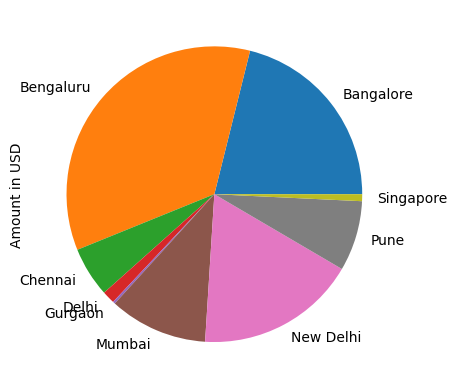

In [55]:
df[df['Investors Name'].str.contains('IDG', na=False)].groupby('City')['Amount in USD'].sum().plot(kind='pie')

<Axes: xlabel='Vertical'>

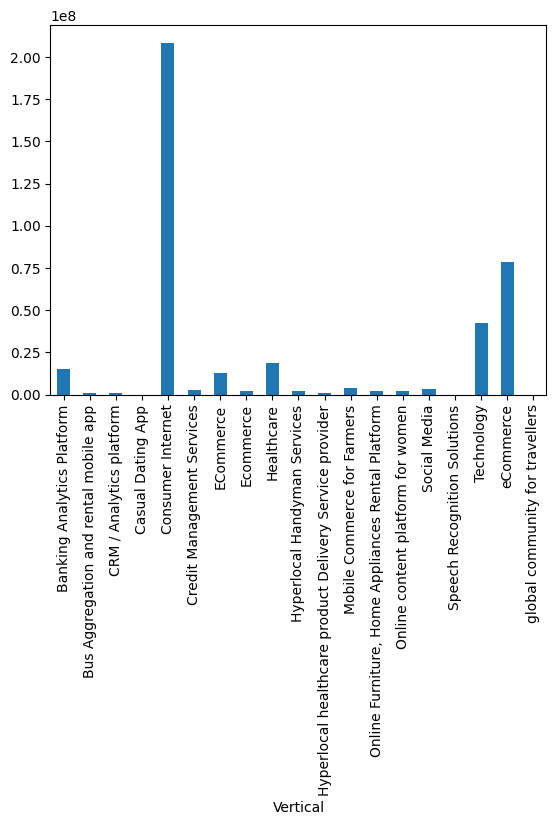

In [57]:
df[df['Investors Name'].str.contains('IDG',na=False)].groupby('Vertical')['Amount in USD'].sum().plot(kind='bar')

# Overview

In [58]:
import plotly.graph_objects as go
import numpy as np
import pandas as pd
import plotly.express as px